# Linear Regression Demo

使用`numpy`来实现一个简单的线性回归 demo


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 一、生成数据集


(2,)
(10000, 2)
(10000,)


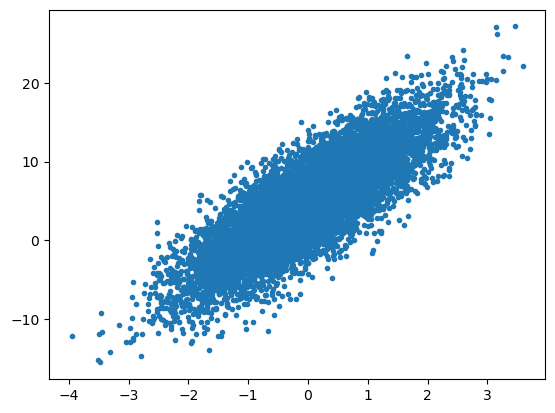

In [2]:
def generate_dataset(w, b, nums):
    x = np.random.normal(0, 1, (nums, len(w)))
    y = np.matmul(x, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return x, y


true_w = np.array([-3.2, 4.7])
true_b = 4.7

x, y = generate_dataset(true_w, true_b, 10000)

print(true_w.shape)
print(x.shape)
print(y.shape)

plt.scatter(x[:, 1], y, marker=".")
plt.show()

## 二、初始化参数


In [3]:
batch_size = 10
lr = 0.01

w = np.zeros(true_w.shape)
b = 0.0

## 三、读取数据集


In [4]:
def data_iter(batch_size, x, y):
    num_examples = len(x)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    np.random.shuffle(indices)

    batch_idx = 0
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i : min(i + batch_size, num_examples)])
        batch_idx += 1

        yield batch_idx, x[batch_indices], y[batch_indices]

## 四、梯度下降


In [5]:
def compute_gradient(x_batch, y_batch, w, b):
    m = len(x_batch)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = np.matmul(x[i], w) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


def gradient_descent(w, b, x_batch, y_batch):
    batch_size = len(x_batch)

    for i in range(batch_size):
        dj_dw, dj_db = compute_gradient(x_batch, y_batch, w, b)
        w -= lr * dj_dw
        b -= lr * dj_db

    return w, b

## 五、训练模型

10 batches: loss: 3.1237776
20 batches: loss: 0.52408535
30 batches: loss: 0.16644178
40 batches: loss: 0.097836665
50 batches: loss: 0.053000898
60 batches: loss: 0.017272989
70 batches: loss: 0.0069289416
80 batches: loss: 0.0040517274
90 batches: loss: 0.0021789426
100 batches: loss: 0.0012564914
110 batches: loss: 0.00093478141
120 batches: loss: 0.00076702454
130 batches: loss: 0.00035264479
140 batches: loss: 0.000173529
150 batches: loss: 0.00012169279
160 batches: loss: 7.8230309e-05
170 batches: loss: 9.2609132e-05
180 batches: loss: 4.7583769e-05
190 batches: loss: 7.7269808e-05
200 batches: loss: 3.904582e-05
210 batches: loss: 5.4483485e-05
220 batches: loss: 5.7359867e-05
230 batches: loss: 5.8639328e-05
240 batches: loss: 7.5667661e-05
250 batches: loss: 4.5240096e-05
260 batches: loss: 6.9233823e-05
270 batches: loss: 5.0796878e-05
280 batches: loss: 0.0001202225
290 batches: loss: 0.0001184447
300 batches: loss: 3.3163234e-05
310 batches: loss: 5.4290682e-05
320 batches

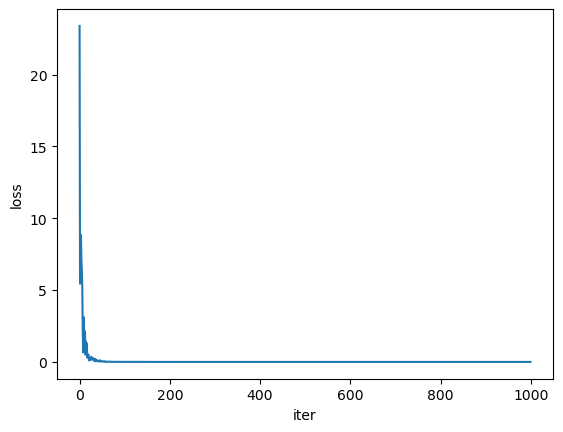

In [6]:
loss_y = []


def loss_function(x_batch, y_batch, w, b):
    m = len(x_batch)

    loss = 0

    for i in range(m):
        f_wb = np.matmul(x_batch[i], w) + b
        loss += (f_wb - y_batch[i]) ** 2

    return 1 / (2 * m) * loss


for idx, x_batch, y_batch in data_iter(batch_size, x, y):
    w, b = gradient_descent(w, b, x_batch, y_batch)
    loss = loss_function(x_batch, y_batch, w, b)

    loss_y.append(loss)

    if idx % 10 == 0:
        print(f"{idx} batches: loss:{loss: 0.8}")

plt.plot(loss_y)
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()

## 六、比较参数

In [7]:
print(f"origin params: {true_w}", f"{true_b: 0.3}")
print(f"model params: {w}", f"{b: 0.3}")

origin params: [-3.2  4.7]  4.7
model params: [-3.20555991  4.6963395 ]  4.7
